<a href="https://colab.research.google.com/github/Maheswarisv/Data_Analysis_using_python/blob/Netflix_data_analysis/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
/content/drive/MyDrive/data_analysis_using_python/netflix_titles_nov_2019.csv


In [22]:
!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.8/dist-packages
Requires: pyparsing, cycler, kiwisolver, python-dateutil, numpy
Required-by: yellowbrick, wordcloud, seaborn, scikit-image, pycocotools, prophet, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fastai, descartes, datascience, daft, arviz


In [25]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os



In [4]:
df= pd.read_csv('/content/drive/MyDrive/data_analysis_using_python/netflix_titles_nov_2019.csv')

In [6]:
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


In [7]:
dups= df.duplicated(['title','country','type','release_year'])
df[dups]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1134,80175351,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,NaN,2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie


## removed duplicates

In [8]:
df=df.drop_duplicates(['title','country','type','release_year'])
dups= df.duplicated(['title','country','type','release_year'])
df[dups]
df_nodup=df


In [9]:
df_rm_id=df_nodup.drop('show_id',axis=1)


In [10]:
df_rm_id_Ind=df_rm_id.reset_index()

In [11]:
df_rm_id_Ind

,index,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5830,5832,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5831,5833,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5832,5834,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5833,5835,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


create a collumn for no. of cast

In [12]:
df_rm_id_Ind['cast']=df_rm_id_Ind['cast'].replace(np.nan,'Unknown')
def cast_counter(cast):
    if cast=='Unknown':
        return 0
    else:
        lst=cast.split(', ')
        length=len(lst)
        return length
df_rm_id_Ind['number_of_cast']=df_rm_id_Ind['cast'].apply(cast_counter)
df_rm_id_Ind['cast']=df_rm_id_Ind['cast'].replace('Unknown',np.nan)
df_castcount = df_rm_id_Ind


In [13]:
df_castcount['rating'] = df_castcount['rating'].fillna(df_castcount['rating'].mode()[0])
df_rtng = df_castcount 

In [64]:
df_rtng['date_added'] = df_rtng['date_added'].fillna('January 1,{}'.format(str(df_rtng['release_year'].mode()[0])))

df_datefxd = df_rtng



In [65]:
df_datefxd 

,index,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,number_of_cast,date_added_cleaned
0,0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8,2019-11-30
1,1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1,2019-11-30
2,2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8,2019-11-30
3,3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,9,2019-11-29
4,4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","January 1, 2020",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,10,2020-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,5832,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,10,2010-11-1
5831,5833,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,6,2009-11-18
5832,5834,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,12,2009-5-5
5833,5835,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,0,2008-2-4


In [66]:
for i , j in zip(df_datefxd['country'].values,df_datefxd.index):
  if i== np.nan:
    if('anime'in df_datefxd.loc[j,'Listed_in']) or ('Anime' in df_datefxd.loc[j,Listed_in]):
      df_datefxd.loc[j,'country']='Japan'
    else:
      continue
  else:
    continue
df_cntryfxd = df_datefxd

In [67]:
import re
months={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}
date_r =[]
for i in df_cntryfxd['date_added'].values:
    str1=re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+',i)
    str2=re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+',i)
    str3=re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)',i)
    date='{}-{}-{}'.format(str3[0],months[str1[0]],str2[0])
    date_r.append(date)
    

In [68]:
df_cntryfxd['date_added_cleaned'] = date_r

In [69]:
df_dtclnd = df_cntryfxd.drop('date_added',axis=1)

In [80]:
df_dtclnd['date_added_cleaned'] = df_dtclnd['date_added_cleaned'].astype('datetime64[ns]')
df_Cleaned = df_dtclnd
df_Cleaned['date_added_cleaned'].dt.year.unique()

array([2019, 2020, 2016, 2011, 2015, 2017, 2014, 2009, 2018, 1987, 2013,
       2012, 2007, 2004, 1975, 2005, 2008, 1994, 1978, 2006, 2010, 1969,
       2001, 1993, 1968, 1964, 1991, 2000, 2002, 1989, 1999, 1998, 1996])

Replece UR Category by NR

In [71]:
for i in df_Cleaned.index:
  if df_Cleaned.loc[i,'rating']== 'UR':
    df_Cleaned.loc[i,'rating']= 'NR'

In [72]:
plt.style.use('seaborn-whitegrid')

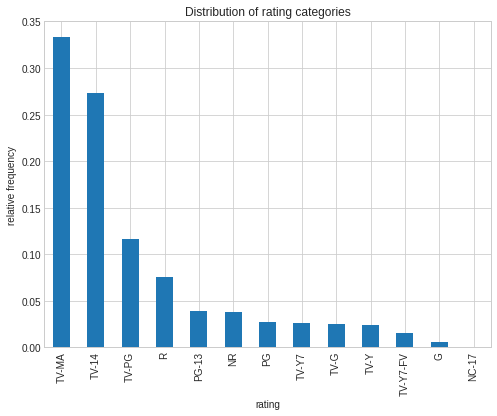

In [73]:
plt.figure(figsize=(8,6))
df_Cleaned['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

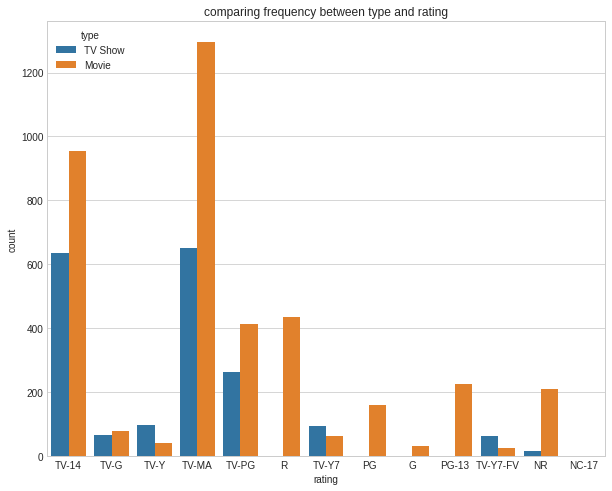

In [74]:
plt.figure(figsize=(10,8))
sb.countplot(x='rating',hue='type',data=df_Cleaned)
plt.title('comparing frequency between type and rating')
plt.show()

figure it out the top 5 countries 

In [75]:
df_Cleaned['country'].value_counts().sort_values(ascending=False)


United States                                                                                               1907
India                                                                                                        696
United Kingdom                                                                                               336
Japan                                                                                                        167
Canada                                                                                                       139
                                                                                                            ... 
United Arab Emirates, Jordan                                                                                   1
Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands       1
Canada, United Kingdom, Netherlands                                                             

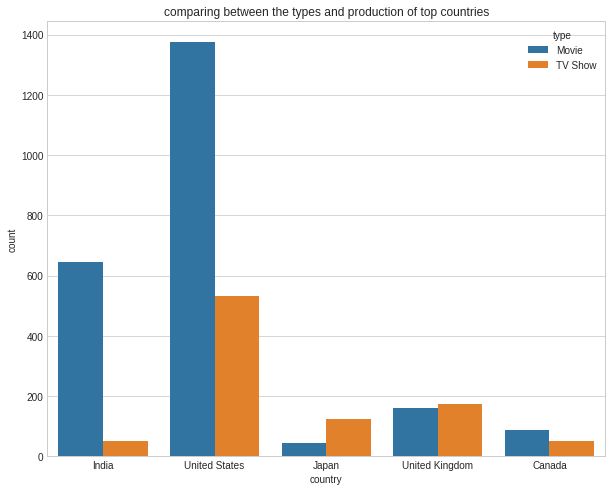

In [76]:
Top_productive_countries = df_Cleaned[(df_Cleaned['country']== 'United States')|
                                      (df_Cleaned['country']=='India')|(df_Cleaned['country']=='United Kingdom')|
                                      (df_Cleaned['country']=='Japan')|(df_Cleaned['country']=='Canada')]
plt.figure(figsize=(10,8))  
sb.countplot(x='country',hue='type',data= Top_productive_countries)   
plt.title('comparing between the types and production of top countries')  
plt.show()   

In [79]:
df_Cleaned['year_added']=df_Cleaned['date_added_cleaned'].dt.year
df_Cleaned.groupby('year_added')['type'].value_counts(normalize=True)*100
df_Cleaned['date_added_cleaned'].dt.year.unique()

array([2019, 2020, 2016, 2011, 2015, 2017, 2014, 2009, 2018, 1987, 2013,
       2012, 2007, 2004, 1975, 2005, 2008, 1994, 1978, 2006, 2010, 1969,
       2001, 1993, 1968, 1964, 1991, 2000, 2002, 1989, 1999, 1998, 1996])